In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [5]:
!pip install tensorflow-io==0.36.0


ERROR: Could not find a version that satisfies the requirement tensorflow-io==0.36.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-io==0.36.0


In [3]:
print("Num of GPU", len(tf.config.list_physical_devices('GPU')))

Num of GPU 0


In [71]:
ruta = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil/Datos_nuevos/enero_2020/imgs6.csv"
df = pd.read_csv(ruta, sep=';')
df

,imgs,msks
0,imagen_0_0.png,mascara_0_0.png
1,imagen_0_1.png,mascara_0_1.png
2,imagen_0_10.png,mascara_0_10.png
3,imagen_0_11.png,mascara_0_11.png
4,imagen_0_12.png,mascara_0_12.png
...,...,...
4358,img_YES_07605.png,cla_YES_07605.png
4359,img_YES_07606.png,cla_YES_07606.png
4360,img_YES_07607.png,cla_YES_07607.png
4361,img_YES_07707.png,cla_YES_07707.png


In [72]:
# Mezclar aleatoriamente filas de metadata.csv
df = df.sample(frac=1, random_state=33)
df.head()

,imgs,msks
4205,img_YES_06672.png,cla_YES_06672.png
446,imagen_17_6.png,mascara_17_6.png
1829,imagen_42_35.png,mascara_42_35.png
3835,img_YES_05782.png,cla_YES_05782.png
3739,img_YES_05575.png,cla_YES_05575.png


In [73]:
# Tamaños sets train, val, test
N = df.shape[0] # Cantidad total de datos
n_train = int(0.80*N) # Cantidad de datos de entrenamiento
n_val = int(0.10*N) # Cantidad de datos de validación
n_test = N - n_train - n_val # Cantidad de datos de prueba

print(N, n_train, n_val, n_test)

4363 3490 436 437


In [74]:
# Arreglos entrenamiento
x_train_fnames = df['imgs'].values[0:n_train]
y_train_fnames = df['msks'].values[0:n_train]

# Arreglos validación
x_val_fnames = df['imgs'].values[n_train:n_train+n_val]
y_val_fnames = df['msks'].values[n_train:n_train+n_val]

# Arreglos prueba
x_test_fnames = df['imgs'].values[n_train+n_val:]
y_test_fnames = df['msks'].values[n_train+n_val:]

for name1, name2 in zip(x_train_fnames, y_train_fnames):
    print(name1,name2)

img_YES_06672.png cla_YES_06672.png
imagen_17_6.png mascara_17_6.png
imagen_42_35.png mascara_42_35.png
img_YES_05782.png cla_YES_05782.png
img_YES_05575.png cla_YES_05575.png
img_YES_02832.png cla_YES_02832.png
img_YES_06295.png cla_YES_06295.png
imagen_21_46.png mascara_21_46.png
imagen_1_2.png mascara_1_2.png
img_YES_06140.png cla_YES_06140.png
imagen_39_45.png mascara_39_45.png
imagen_18_42.png mascara_18_42.png
img_YES_02991.png cla_YES_02991.png
imagen_44_9.png mascara_44_9.png
img_YES_02693.png cla_YES_02693.png
imagen_25_39.png mascara_25_39.png
imagen_15_7.png mascara_15_7.png
imagen_46_46.png mascara_46_46.png
img_YES_05276.png cla_YES_05276.png
imagen_13_42.png mascara_13_42.png
imagen_39_36.png mascara_39_36.png
imagen_20_44.png mascara_20_44.png
imagen_16_14.png mascara_16_14.png
imagen_6_13.png mascara_6_13.png
img_YES_04771.png cla_YES_04771.png
img_YES_06499.png cla_YES_06499.png
imagen_33_2.png mascara_33_2.png
imagen_16_17.png mascara_16_17.png
imagen_27_21.png mascar

In [75]:
import tensorflow as tf

ds_train = tf.data.Dataset.from_tensor_slices((x_train_fnames, y_train_fnames))
ds_val = tf.data.Dataset.from_tensor_slices((x_val_fnames, y_val_fnames))
ds_test = tf.data.Dataset.from_tensor_slices((x_test_fnames, y_test_fnames))

print(len(ds_train), len(ds_val), len(ds_test))

3490 436 437


In [76]:
for img_fname, msk_fname in ds_test.take(1):
    print(img_fname.numpy(),msk_fname.numpy())

b'imagen_29_3.png' b'mascara_29_3.png'


In [77]:
imgpath= img_fname.numpy()
mskpath= msk_fname.numpy()
imgpath,mskpath

(b'imagen_29_3.png', b'mascara_29_3.png')

In [78]:
# Fijar directorios para las imágenes y las máscaras
#DIR_IMGS = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/input_training/image/"
#DIR_MSKS = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/input_training/class/"
DIR_IMGS = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil/Datos_nuevos/enero_2020/imgs6/"
DIR_MSKS = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil/Datos_nuevos/enero_2020/msks4/"

# La función para lectura y pre-procesamiento
def preprocesar_imagen(imgpath, mskpath):
    # Leer imagen y máscara
    img = tf.io.read_file(DIR_IMGS + imgpath)
    msk = tf.io.read_file(DIR_MSKS + mskpath)

    # Decodificar imagen con "decode_png" (4 canales)
    # y máscara con "decode_png" (1 canal)
    #img = tf.image.decode_png(img, channels=4) #uint8
    img = tf.image.decode_png(img, channels=4) #uint8
    msk = tf.image.decode_png(msk, channels=1) #uint8

    # Convertir la imagen a "float32"
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    msk = tf.image.convert_image_dtype(msk, dtype=tf.float32)

    return img, msk

In [79]:
ds_mini = ds_val.map(preprocesar_imagen).take(1)
ds_mini

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None))>

(128, 128, 4)
(128, 128, 1)
(128, 128, 4)
(128, 128, 1)


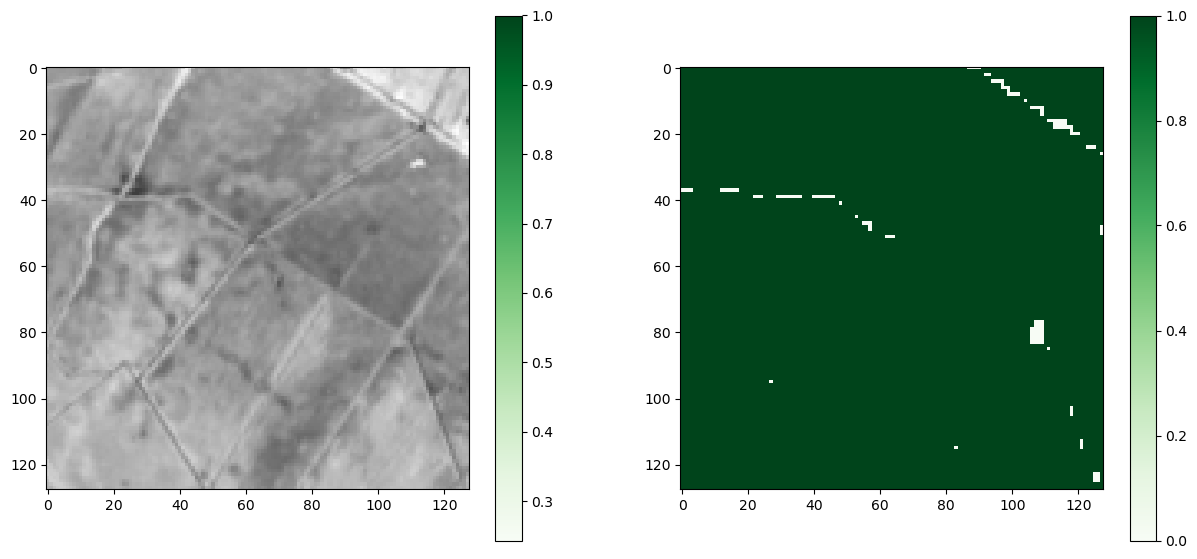

In [84]:
# Extraer la primera imagen del set de entrenamiento
ds_mini = ds_train.map(preprocesar_imagen).take(2)

# Imprimir tamaño y categoría
for img, msk in ds_mini:
    print((img).numpy().shape)
    print((msk).numpy().shape)

# Y graficarlas
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(img, cmap = "Greens")
plt.axis('on')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(msk, cmap = "Greens")
plt.axis('on')
plt.colorbar();


In [85]:
# Máscara en detalle
import plotly.express as px

fig = px.imshow(msk.numpy().squeeze())
fig.show()

In [86]:
from tensorflow.keras import layers

# Fijar la semilla
tf.random.set_seed(123)

# Tamaños entrada y número de categorías
img_size = (128,128,4) # El tamaño de cada patch
nclases = 1 #Rice crops

# ===============
# Entrada
entrada = tf.keras.Input(shape=img_size)

# ===============
# Codificador

# conv1
conv1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(entrada)
conv1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv1)
#norm1 = layers.normalization.BatchNormalization()(conv1)
pool1 = layers.MaxPool2D((2,2))(conv1)

# conv2
conv2 = layers.Conv2D(64,(3,3),activation='relu',padding='same')(pool1)
conv2 = layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv2)
pool2 = layers.MaxPool2D((2,2))(conv2)

# conv3
conv3 = layers.Conv2D(128,(3,3),activation='relu',padding='same')(pool2)
conv3 = layers.Conv2D(128,(3,3),activation='relu',padding='same')(conv3)
pool3 = layers.MaxPool2D((2,2))(conv3)

# conv4
conv4 = layers.Conv2D(256,(3,3),activation='relu',padding='same')(pool3)
conv4 = layers.Conv2D(256,(3,3),activation='relu',padding='same')(conv4)
pool4 = layers.MaxPool2D((2,2))(conv4)

# conv5
conv5 = layers.Conv2D(512,(3,3),activation='relu',padding='same')(pool4)
conv5 = layers.Conv2D(512,(3,3),activation='relu',padding='same')(conv5)

# ===============
# Decodificador

# dec1
dec1 = layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(conv5)
dec1 = layers.concatenate([dec1,conv4])
dec1 = layers.Conv2DTranspose(256, (3,3), activation='relu', padding='same')(dec1)
dec1 = layers.Conv2DTranspose(256, (3,3), activation='relu', padding='same')(dec1)

# dec2
dec2 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(dec1)
dec2 = layers.concatenate([dec2,conv3])
dec2 = layers.Conv2DTranspose(128, (3,3), activation='relu', padding='same')(dec2)
dec2 = layers.Conv2DTranspose(128, (3,3), activation='relu', padding='same')(dec2)

# dec3
dec3 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(dec2)
dec3 = layers.concatenate([dec3,conv2])
dec3 = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same')(dec3)
dec3 = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same')(dec3)

# dec4
dec4 = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(dec3)
dec4 = layers.concatenate([dec4,conv1])
dec4 = layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same')(dec4)
dec4 = layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same')(dec4)

# ===============
# Salida
salida = layers.Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(dec4)

# ===============
# Interconectar todo en un modelo
unet_model = tf.keras.models.Model(inputs=entrada, outputs=salida)
unet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │      1,184 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │      9,248 │ conv2d_22[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │     36,928 │ conv2d_24[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 32, 32,    │    147,584 │ conv2d_26[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 16, 16,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 16, 16,    │    295,168 │ max_pooling2d_10… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 16, 16,    │    590,080 │ conv2d_28[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 8, 8, 256) │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 8, 8, 512) │  1,180,160 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 8, 8, 512) │  2,359,808 │ conv2d_30[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_24 │ (None, 16, 16,    │    524,544 │ conv2d_31[0][0]   │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 16, 16,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 512)              │            │ conv2d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,760,385 (29.60 MB)

 Trainable params: 7,760,385 (29.60 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from tensorflow.keras import backend as K

In [88]:
# Funciones para métricas y costo
#Función para determinar el Coeficiente Dice
def dice_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection +1)/ (union+1)
# Función para determinar el coeficiente IoU
def iou_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    total = K.sum(y_true) + K.sum(y_pred)
    union = total-intersection
    iou = (intersection + 1) / (total-intersection + 1)
    return iou
# Función Loss
def dice_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [89]:
unet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    #loss = 'sparse_categorical_crossentropy',
    loss = dice_loss,
    metrics=[ 'accuracy', dice_coef, iou_coef, dice_loss]
)
#Agregué métrica 'Accuracy'
# optimizer = 'adam'

In [90]:
# Definir el batch size

#prueba 3, empleado por el grupo de investigación de Brasil
BATCH_SIZE_TRAIN = 4 
BATCH_SIZE_VAL = 4  
# Crear los lotes (aún no leemos las imágenes)
train_batch = ds_train.map(preprocesar_imagen).batch(BATCH_SIZE_TRAIN)
val_batch = ds_val.map(preprocesar_imagen).batch(BATCH_SIZE_VAL)

In [ ]:
# Y entrenar el modelo: ¡en este punto SÍ se leen las imágenes!
history = unet_model.fit(train_batch,
         validation_data = val_batch,
         epochs = 25,
         verbose=1)

Epoch 1/25
271/873 ━━━━━━━━━━━━━━━━━━━━ 2:25 242ms/step - accuracy: 0.2608 - dice_coef: 0.3239 - dice_loss: 0.6761 - iou_coef: 0.2027 - loss: 0.6761

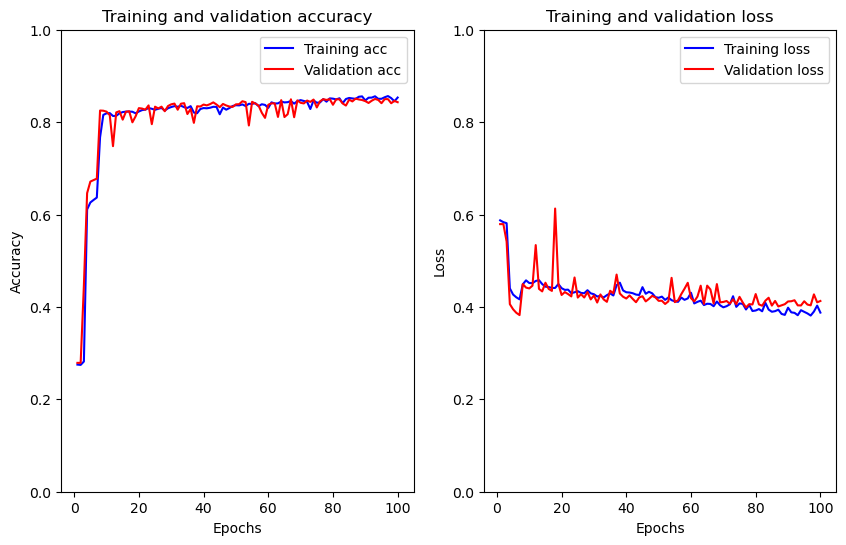

In [61]:
import matplotlib.pyplot as plt
# Get the loss and accuracy values from the history dictionary
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the loss and accuracy curves
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()



plt.show()

In [62]:
# Preprocesar y hacer batches de test
test_batch = ds_test.map(preprocesar_imagen).batch(len(ds_test))

In [63]:
test_batch

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None))>

In [64]:
preds = unet_model.predict(test_batch) # Probabilidades

# Imprimir tamaño en pantalla
print(preds.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
(323, 128, 128, 1)


In [65]:
import numpy as np

# Las distribuciones de probabilidad
print(preds[1,1,1,:])

# La categoría a la que pertenece el pixel
np.argmax(preds[1,1,1,:])

[0.]


0

In [66]:
# Máscaras de segmentación
# axis = 3: buscar el máximo de cada plano
mascaras = np.argmax(preds,axis=3)
print(mascaras.shape)

(323, 128, 128)


In [67]:
test_list = list(test_batch.unbatch().as_numpy_iterator())

# Almacenar imágenes y máscaras de prueba como arreglos de NumPy
imgs = np.asarray([item[0] for item in test_list])
msks = np.asarray([item[1] for item in test_list])

print(imgs.shape)
print(msks.shape)

(323, 128, 128, 4)
(323, 128, 128, 1)


315

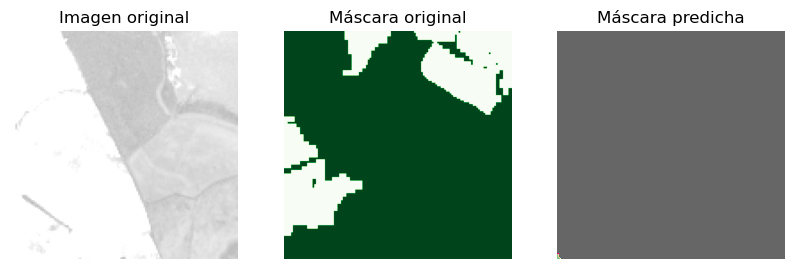

In [68]:
# Mostrar imagen, máscara y predicción

# Escoger una imagen aleatoriamente
id = np.random.randint(0,len(ds_test))

# Generar figura
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))

# Imagen original
ax1.imshow(imgs[id],  cmap = 'Greens_r')
#,  'Greens_r'
ax1.set_title('Imagen original')
ax1.axis('off')

# Máscara original
ax2.imshow(msks[id],  cmap = 'Greens_r')
ax2.set_title('Máscara original')
ax2.axis('off')

# Máscara predicha
ax3.imshow(preds[id],  cmap = 'Accent_r')
ax3.set_title('Máscara predicha')
ax3.axis('off');

id

#  Calcular IoU

In [69]:
imgs.shape

(323, 128, 128, 4)

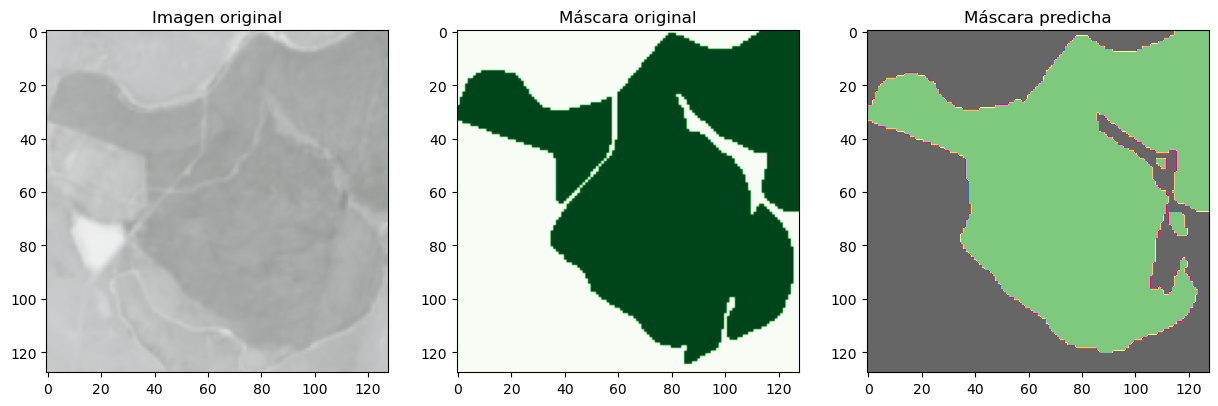

Imagen 32, Accuracy: 0.9518, IoU: 0.9151, Dice: 0.9556, Loss_dice (%): 4.4357 


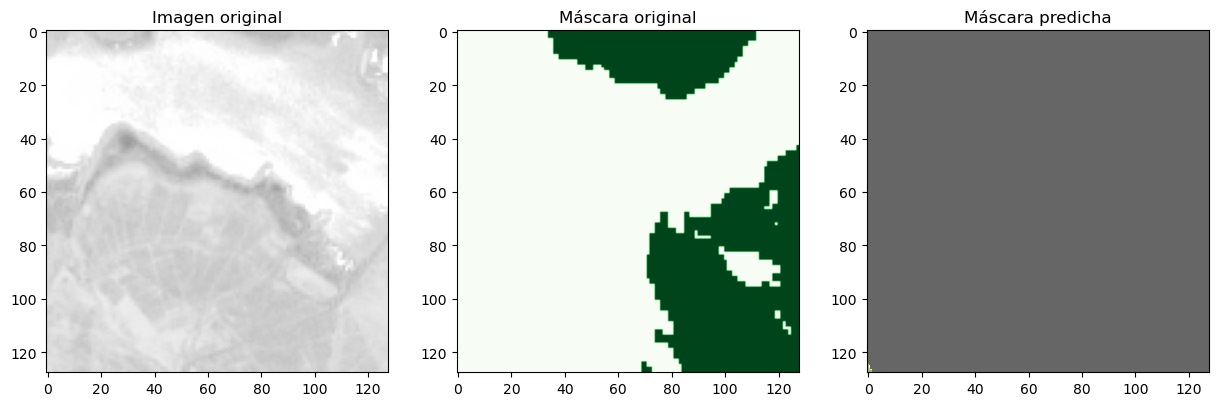

Imagen 54, Accuracy: 0.7196, IoU: 0.0000, Dice: 0.0000, Loss_dice (%): 100.0000 


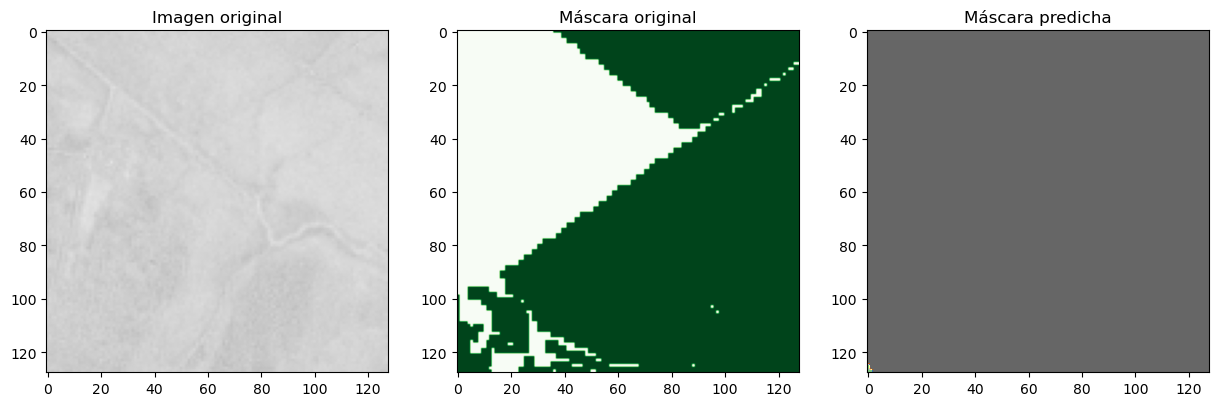

Imagen 225, Accuracy: 0.3495, IoU: 0.0004, Dice: 0.0008, Loss_dice (%): 99.9250 


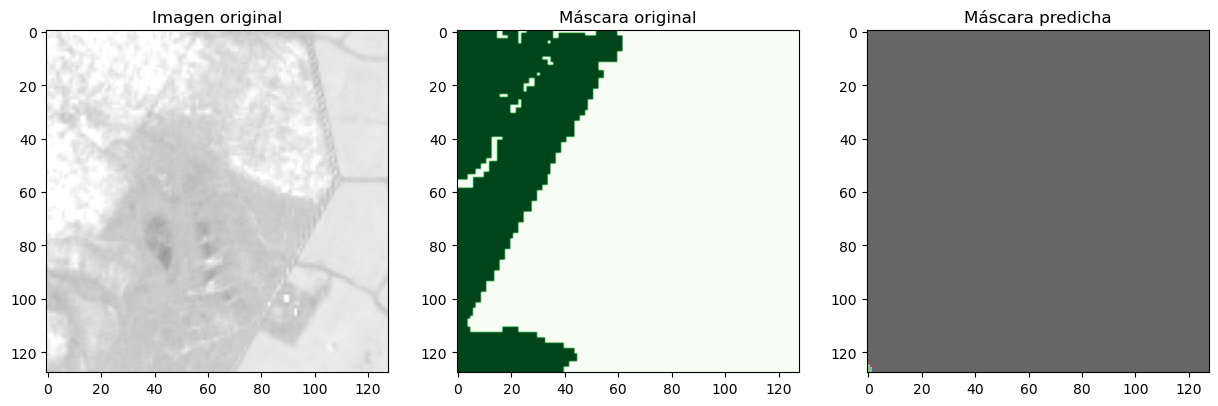

Imagen 95, Accuracy: 0.7443, IoU: 0.0012, Dice: 0.0024, Loss_dice (%): 99.7619 


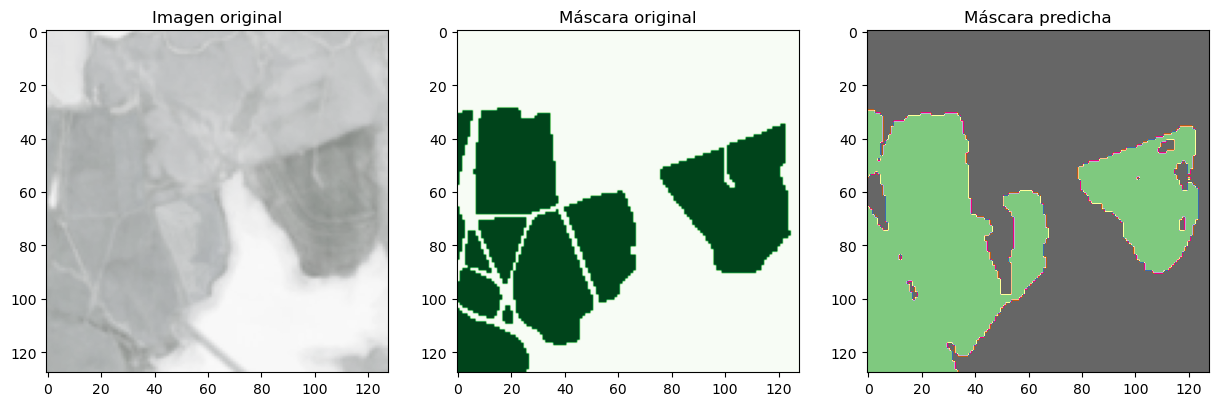

Imagen 49, Accuracy: 0.9210, IoU: 0.7988, Dice: 0.8881, Loss_dice (%): 11.1880 


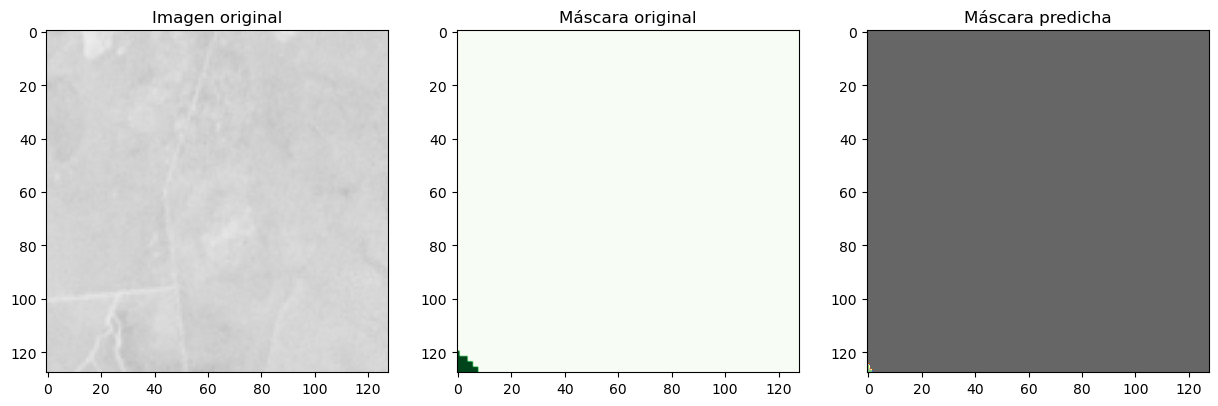

Imagen 266, Accuracy: 0.9979, IoU: 0.1053, Dice: 0.1905, Loss_dice (%): 80.9524 


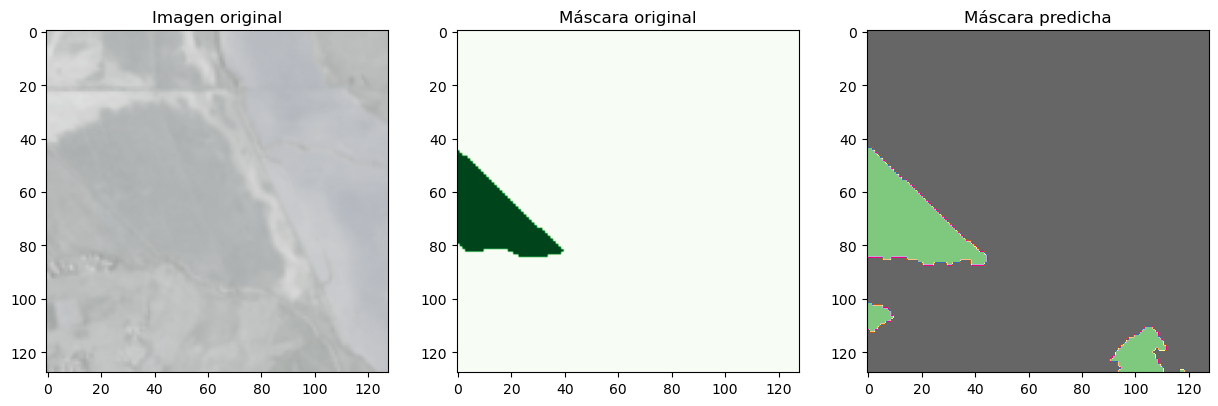

Imagen 223, Accuracy: 0.9692, IoU: 0.6135, Dice: 0.7605, Loss_dice (%): 23.9544 


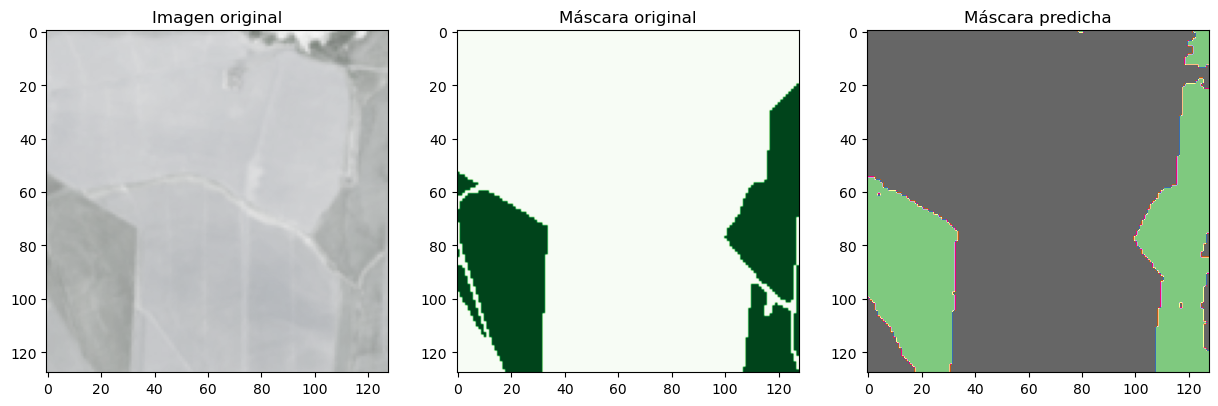

Imagen 90, Accuracy: 0.9698, IoU: 0.8715, Dice: 0.9314, Loss_dice (%): 6.8649 


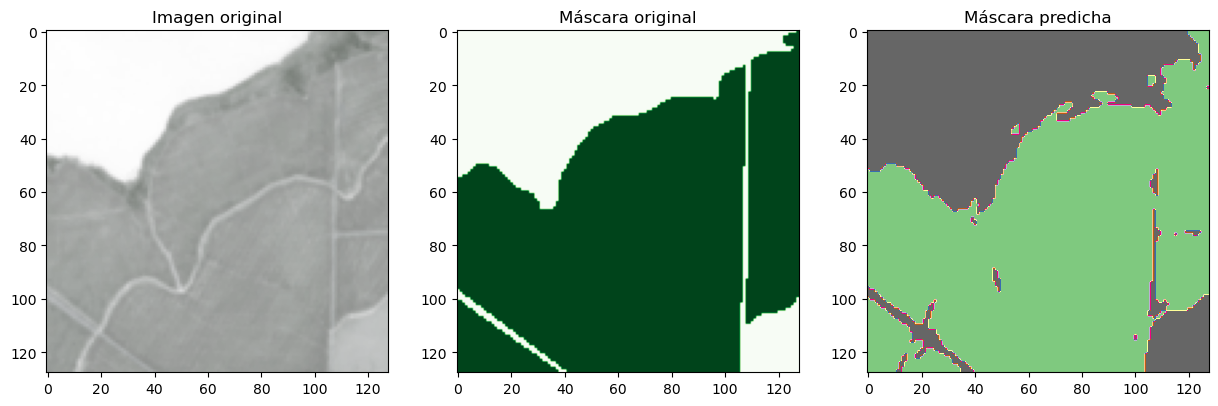

Imagen 206, Accuracy: 0.9362, IoU: 0.9077, Dice: 0.9516, Loss_dice (%): 4.8404 


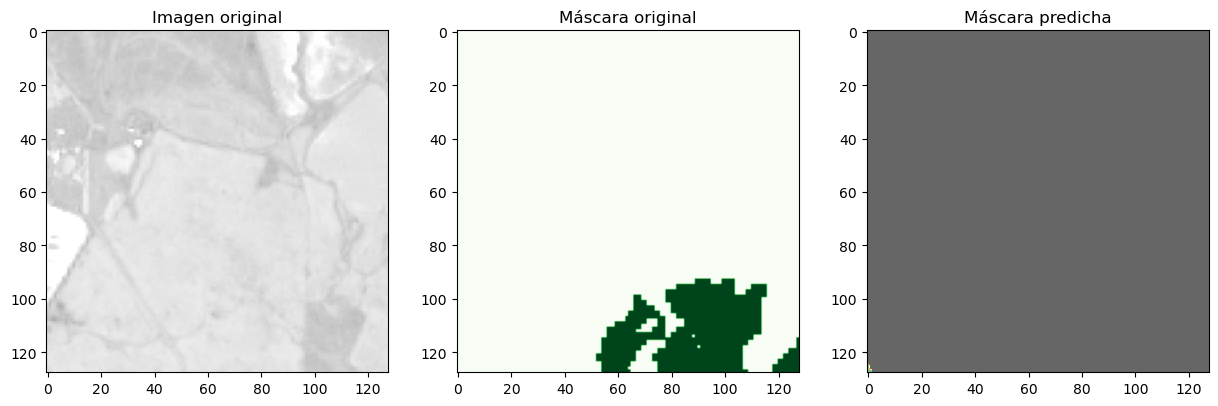

Imagen 13, Accuracy: 0.9059, IoU: 0.0000, Dice: 0.0000, Loss_dice (%): 100.0000 


In [70]:
#Visualizar "n" imágenes con su máscara real y máscara predica, presentar el valor de las métricas accuracy, IoU y Dice paracada imagen

# Obtener las imágenes y máscaras de prueba
test_list = list(test_batch.unbatch().as_numpy_iterator())
imgs = np.asarray([item[0] for item in test_list])
msks = np.asarray([item[1] for item in test_list])

# Función para calcular IoU y Dice
def calculate_iou(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    if union == 0:
        return 1
    return intersection / union

def calculate_dice(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))

for i in range(10):
    # Escoger una imagen aleatoriamente
    id = np.random.randint(0, len(ds_test))

    # Generar figura
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Imagen original
    ax1.imshow(imgs[id], cmap = 'Greens')
    ax1.set_title('Imagen original')
    ax1.axis('on')

    # Máscara original
    ax2.imshow(msks[id].squeeze(), cmap = 'Greens')
    ax2.set_title('Máscara original')
    ax2.axis('on')

    # Máscara predicha
    pred_mask = preds[id, :, :, -1] > 0.5  # Umbral de 0.5 para binarizar la predicción
    #ax3.imshow(pred_mask, cmap = 'Greens')
    ax3.imshow(pred_mask, cmap = 'Accent_r')
    ax3.set_title('Máscara predicha')
    ax3.axis('on')
    plt.show()

    # Calcular métricas para la imagen actual
    iou = calculate_iou(msks[id].squeeze(), pred_mask)
    dice = calculate_dice(msks[id].squeeze(), pred_mask)
    accuracy = np.mean(pred_mask == msks[id].squeeze())
    loss_dice = (1-dice)*100


    print(f"Imagen {id}, Accuracy: {accuracy:.4f}, IoU: {iou:.4f}, Dice: {dice:.4f}, Loss_dice (%): {loss_dice:.4f} ")

In [54]:
# prompt: guardar modelo en un archivo

unet_model.save('C:/Users/egild/Documents/DATOS_BRASIL/Unet_Arroz_2019_2020_v7.hdf5')

In [55]:
unet_model.save('C:/Users/egild/Documents/DATOS_BRASIL/Unet_Arroz_2019_2020_v7.keras')

In [56]:
#Validación con datos externos
# cambiar de tamaño una carpeta con imagenes de 640*640 a 128*128

from PIL import Image
import os

def resize_images(input_folder, output_folder, new_width, new_height):
  """Cambia el tamaño de las imágenes en una carpeta a una nueva resolución.

  Args:
    input_folder: La carpeta que contiene las imágenes originales.
    output_folder: La carpeta donde se guardarán las imágenes redimensionadas.
    new_width: El nuevo ancho deseado para las imágenes.
    new_height: La nueva altura deseada para las imágenes.
  """

  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
      img_path = os.path.join(input_folder, filename)
      img = Image.open(img_path)
      resized_img = img.resize((new_width, new_height))
      output_path = os.path.join(output_folder, filename)
      resized_img.save(output_path)

# Ejemplo de uso:
input_folder = 'C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/input_prediction_pt1/'
output_folder = 'C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/redimensionada1'
new_width = 128
new_height = 128

resize_images(input_folder, output_folder, new_width, new_height)



In [37]:
# prompt: generar la lista de los nombres de archivos de una carpeta y guardarlos en un archivo .csv

import os
import csv

def list_files_to_csv(folder_path, csv_filename):
  """Lista los nombres de los archivos en una carpeta y los guarda en un archivo CSV."""

  filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

  with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for filename in filenames:
      writer.writerow([filename])

# Ejemplo de uso:
folder_path = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/redimensionada2/"  # Reemplaza con la ruta de tu carpeta
csv_filename = 'C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/filenames2.csv'
list_files_to_csv(folder_path, csv_filename)

In [1]:
import pandas as pd
ruta2 = 'C:/Users/egild/Documents/DATOS_BRASIL/Panama_199.csv'
df2 = pd.read_csv(ruta2, sep=';')
df2

,imgs
0,tile_0_0.png
1,tile_0_1.png
2,tile_0_2.png
3,tile_1_0.png
4,tile_1_1.png
5,tile_1_2.png
6,tile_2_0.png
7,tile_2_1.png
8,tile_2_2.png


In [15]:
x_test_ext_fnames = df2['imgs']
x_test_ext_fnames.head()


0    tile_0_0.png
1    tile_0_1.png
2    tile_0_2.png
3    tile_1_0.png
4    tile_1_1.png
Name: imgs, dtype: object

In [17]:
import tensorflow as tf
ds_test_ext = tf.data.Dataset.from_tensor_slices((x_test_ext_fnames))
ds_test_ext

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [19]:
print(len(ds_test_ext))

9


In [21]:
for img_fname_ext in ds_test_ext.take(10):
    print(img_fname_ext.numpy())

b'tile_0_0.png'
b'tile_0_1.png'
b'tile_0_2.png'
b'tile_1_0.png'
b'tile_1_1.png'
b'tile_1_2.png'
b'tile_2_0.png'
b'tile_2_1.png'
b'tile_2_2.png'


In [23]:
imgpath_ext= img_fname_ext.numpy()

In [155]:
imgpath_ext

b'tile_2_2.png'

In [25]:
# Fijar directorios para las imágenes y las máscaras
DIR_IMGS_EXT = "C:/Users/egild/Downloads/1/1/"
# La función para lectura y pre-procesamiento
def preprocesar_imagen_EXT(imgpath_ext):

    # Leer imagen 
    img_ext = tf.io.read_file(DIR_IMGS_EXT + imgpath_ext)
  

    # Decodificar imagen con "decode_jpeg" (4 canales)   
    img_ext = tf.image.decode_png(img_ext, channels=4) #uint8
     
    # Convertir la imagen a "float32"
    img_ext = tf.image.convert_image_dtype(img_ext, dtype=tf.float32)
    
       #Cambiar de tamaño a 128, 128
    #img_ext = tf.image.resize(img_ext, (128,128))
   
    return img_ext

(128, 128, 4)


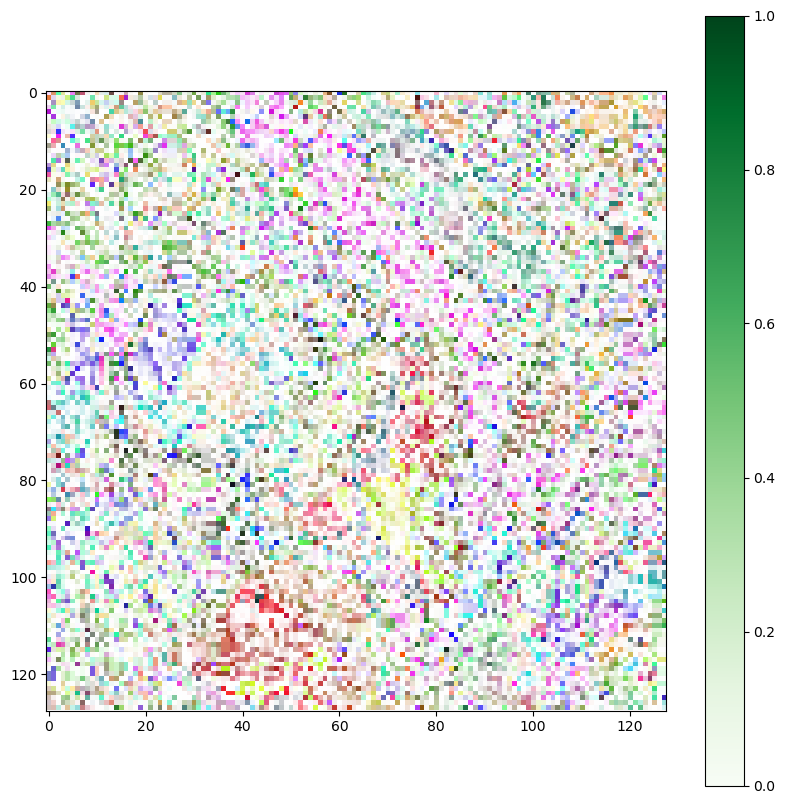

In [31]:
# Extraer la primera imagen del set de evalidación externa
ds_mini_ext = ds_test_ext.map(preprocesar_imagen_EXT).take(1)

# Imprimir tamaño y categoría
for img_ext in ds_mini_ext:
    print((img_ext).numpy().shape)
    
# Y graficarlas
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.imshow(img_ext, cmap = "Greens")
plt.axis('on')
plt.colorbar()



In [33]:
#Cargar modelos entrenados
#Colocar la dirección donde se guardó el modelo
from tensorflow import keras
unet_model1 = keras.models.load_model('C:/Users/egild/Documents/DATOS_BRASIL/Unet_Arroz_2019_2020_v7.hdf5', compile=False)

In [35]:
# Preprocesar y hacer batches de test_ext
test_batch_ext = ds_test_ext.map(preprocesar_imagen_EXT).batch(len(ds_test_ext))

In [37]:
test_batch_ext

<_BatchDataset element_spec=TensorSpec(shape=(None, None, None, 4), dtype=tf.float32, name=None)>

In [39]:
preds_ext = unet_model1.predict(test_batch_ext) # Probabilidades

# Imprimir tamaño en pantalla
print(preds_ext.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
(9, 128, 128, 1)


In [43]:
preds_ext[5, 10, 10, 0]

0.0

In [45]:
import numpy as np

# Reviso las distribuciones de probabilidad
print(preds_ext[5,:,:,:])

# La categoría a la que pertenece el pixel
np.argmax(preds_ext[5,:,:,:])

[[[4.1802577e-32]
  [0.0000000e+00]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 ...

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[2.4408378e-30]
  [0.0000000e+00]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[1.1358488e-15]
  [7.6149406e-32]
  [0.0000000e+00]
  ...
  [0.0000000e+00]
  [0.0000000e+00]
  [6.4539383e-34]]]


16256

In [47]:
# Máscaras de segmentación
# axis = 3: buscar el máximo de cada plano
mascaras_ext = np.argmax(preds_ext,axis=3)
print(mascaras_ext.shape)

(9, 128, 128)


(9, 128, 128, 4)


6

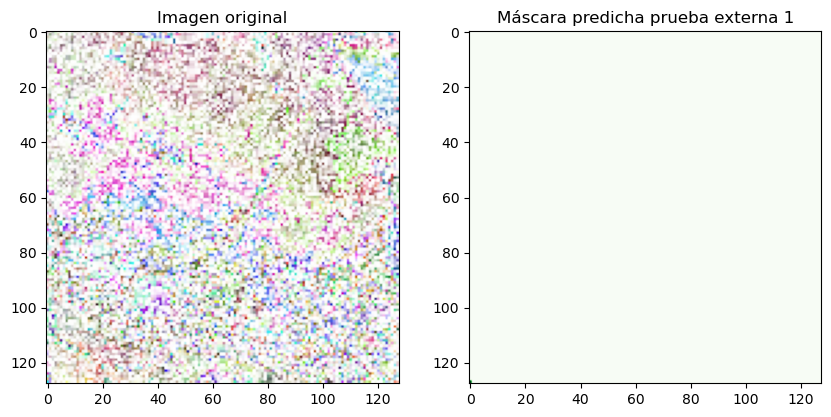

In [60]:
# Mostrar imagen, máscara y predicción

test_list2 = list(test_batch_ext.unbatch().as_numpy_iterator())

# Almacenar imágenes de validación externa como arreglos de NumPy
#img_ext = np.asarray([item[0] for item in test_list2])
img_ext = np.asarray([item for item in test_list2])


print(img_ext.shape)

# Escoger una imagen aleatoriamente
ide = np.random.randint(0,len(ds_test_ext))
#ide = 45
# Generar figura
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

# Imagen original
ax1.imshow(img_ext[ide], cmap='viridis')
#,  'Greens_r'
ax1.set_title('Imagen original')
ax1.axis('on')



# Máscara predicha
ax2.imshow(preds_ext[ide, :, :, -1],  cmap='Greens')
ax2.set_title('Máscara predicha prueba externa 1')
ax2.axis('on');

ide



In [56]:
#Validación externa 2, con datos de Brasil
ruta3 = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/filenames_redim2.csv"
df3 = pd.read_csv(ruta3, sep=';')
df3

,imgs_redim2
0,img_00169.png
1,img_00170.png
2,img_00171.png
3,img_00172.png
4,img_00173.png
...,...
163,img_00332.png
164,img_00333.png
165,img_00334.png
166,img_00335.png


In [58]:
x_test_ext_fnames2 = df3['imgs_redim2']
x_test_ext_fnames2.head()

0    img_00169.png
1    img_00170.png
2    img_00171.png
3    img_00172.png
4    img_00173.png
Name: imgs_redim2, dtype: object

In [24]:
ds_test_ext2 = tf.data.Dataset.from_tensor_slices((x_test_ext_fnames2))
ds_test_ext2

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [25]:
for img_fname_ext2 in ds_test_ext2.take(10):
    print(img_fname_ext2.numpy())

b'img_00169.png'
b'img_00170.png'
b'img_00171.png'
b'img_00172.png'
b'img_00173.png'
b'img_00174.png'
b'img_00175.png'
b'img_00176.png'
b'img_00177.png'
b'img_00178.png'


In [26]:
imgpath_ext2= img_fname_ext2.numpy()

In [27]:
# Fijar directorios para las imágenes y las máscaras
DIR_IMGS_EXT2 = "C:/Users/egild/Documents/DATOS_BRASIL/Datos_Brasil_2/redimensionada2/"

# La función para lectura y pre-procesamiento
def preprocesar_imagen_EXT(imgpath_ext2):

    # Leer imagen 
    img_ext2 = tf.io.read_file(DIR_IMGS_EXT2 + imgpath_ext2)
  

    # Decodificar imagen con "decode_jpeg" (4 canales)   
    img_ext2 = tf.image.decode_png(img_ext2, channels=4) #uint8
  

    # Convertir la imagen a "float32"
    img_ext2 = tf.image.convert_image_dtype(img_ext2, dtype=tf.float32)
   
    return img_ext2

In [28]:
# Preprocesar y hacer batches de test_ext
test_batch_ext2 = ds_test_ext2.map(preprocesar_imagen_EXT).batch(len(ds_test_ext2))

In [29]:
preds_ext2 = unet_model1.predict(test_batch_ext2) # Probabilidades

# Imprimir tamaño en pantalla
print(preds_ext2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
(168, 128, 128, 1)


In [31]:
import numpy as np

# Las distribuciones de probabilidad
print(preds_ext2[100,:,:,:])

# La categoría a la que pertenece el pixel
np.argmax(preds_ext2[100,:,:,:])

[[[1.41737396e-02]
  [7.61186471e-04]
  [1.25054925e-04]
  ...
  [5.32923286e-06]
  [5.03951014e-05]
  [1.47633930e-03]]

 [[6.89586042e-04]
  [3.36800485e-06]
  [1.09438552e-07]
  ...
  [2.42254838e-09]
  [1.21390798e-07]
  [2.91162451e-05]]

 [[1.05355626e-04]
  [1.05406542e-07]
  [1.07347908e-09]
  ...
  [3.02950373e-11]
  [3.96018462e-09]
  [3.85884277e-06]]

 ...

 [[8.74807956e-05]
  [1.02596061e-07]
  [1.62305724e-09]
  ...
  [6.21121557e-12]
  [3.39835848e-09]
  [1.39836811e-05]]

 [[3.20406631e-04]
  [1.44925980e-06]
  [8.33827869e-08]
  ...
  [9.66905889e-10]
  [9.40820755e-08]
  [7.27332008e-05]]

 [[5.50071802e-03]
  [2.17969820e-04]
  [4.74925910e-05]
  ...
  [3.47344508e-06]
  [4.14200294e-05]
  [2.20922264e-03]]]


22

In [32]:
# Máscaras de segmentación
# axis = 3: buscar el máximo de cada plano
mascaras_ext2= np.argmax(preds_ext2,axis=3)
print(mascaras_ext2.shape)

(168, 128, 128)


(168, 128, 128, 4)


12

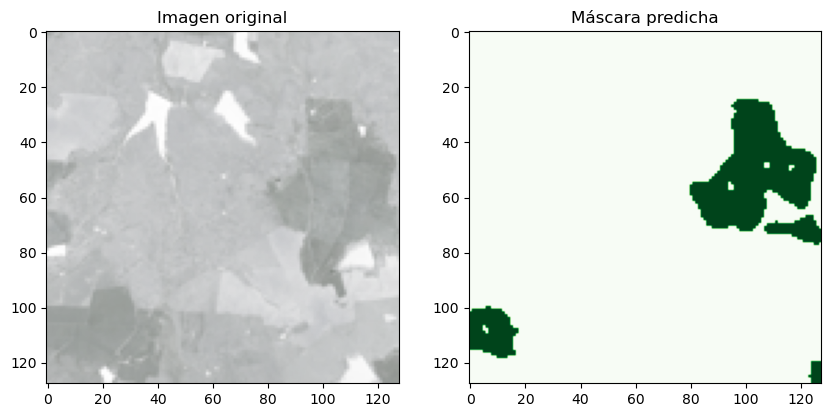

In [33]:
# Mostrar imagen, máscara y predicción prueba externa 2

test_list3 = list(test_batch_ext2.unbatch().as_numpy_iterator())

# Almacenar imágenes de validación externa como arreglos de NumPy
#img_ext = np.asarray([item[0] for item in test_list2])
img_ext2 = np.asarray([item for item in test_list3])


print(img_ext2.shape)

# Escoger una imagen aleatoriamente
ide2 = np.random.randint(0,len(ds_test_ext2))

# Generar figura
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

# Imagen original
ax1.imshow(img_ext2[ide2], cmap='Greens')
#ax1.imshow(mascaras_ext2, alpha=0.6)
#,  'Greens_r'
ax1.set_title('Imagen original')
ax1.axis('on')



# Máscara predicha
ax2.imshow(preds_ext2[ide2, :, :, -1]>0.5, cmap='Greens')
ax2.set_title('Máscara predicha')
ax2.axis('on');

ide2

In [ ]:
#Colocar datos Brasil nuevo

In [ ]:
#Colocar datos USA

In [ ]:
#Colocar datos Panam;a